In [1]:
import pyart
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks 
import datetime as dt
from datetime import date
from datetime import time
from datetime import timedelta
import pandas as pd

import warnings
import glob
import gc
import copy
import os
import scipy as scipy

import sys

base_path = '/nfs/foe-data-32/export/ncas/earljbe/mount/'
sys.path.append(os.path.join(base_path,'ncas_radar_vol1/bin/'))

import calib_functions

warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
outdir = os.path.join(base_path, 'ncas_radar_vol2/chilbolton/calibrations/ZDRcalib_2020/')
proc_dates = [os.path.basename(x) for x in glob.glob(outdir+'20*')]

all_hourly_data=pd.DataFrame()
all_data = pd.DataFrame()
#aws_all_data = pd.DataFrame()

for date in proc_dates[0:]:
    file2 = os.path.join(outdir,date,'hourly_ml_zdr.csv')
    file1 = os.path.join(outdir,date,'day_ml_zdr.csv')
    if os.path.exists(file2):
        data2 = pd.read_csv(file2,index_col=0, parse_dates=True)
    #Concatenate days together
        all_hourly_data = pd.concat([all_hourly_data, data2])
        
    if os.path.exists(file1):    
        data1 = pd.read_csv(file1,index_col=0, parse_dates=True)
        all_data = pd.concat([all_data, data1])
        
#     aws_file = os.path.join(awsdir,'CUSTOM-ARC-'+date[0:4]+'-'+date[4:6]+'-'+date[6:8]+'-METRIC.csv')
#     if os.path.exists(aws_file):
#         aws_data = pd.read_csv(aws_file,index_col=0,parse_dates=True)
#         if aws_data.empty==False:
#             aws_data = aws_data.resample('H').mean()
#             aws_all_data = pd.concat([aws_all_data, aws_data])
        
zdr_day_avg2 = all_hourly_data.resample('D').mean()
zdr_std2 = all_hourly_data.resample('D').std()

zdr_day_avg1 = all_data.resample('D').mean()
zdr_std1 = all_data.resample('D').std()

#aws_all_data.columns=['TA','TW','HIndex','RH','TD','WS','HiWS','WD','R','RRate','P','InTA','InRH']

In [4]:
all_hourly_data['2017-05-15']

,H_ML,H_ZDR
2017-05-15 04:30:00,2.2758,-1.804572
2017-05-15 05:30:00,2.3508,-1.789699
2017-05-15 06:30:00,2.3958,-1.772803
2017-05-15 07:30:00,2.5908,-1.764437
2017-05-15 08:30:00,2.6208,-1.668636
2017-05-15 09:30:00,2.6808,0.256015
2017-05-15 10:30:00,2.6658,0.043526
2017-05-15 20:30:00,2.9808,0.014654


In [4]:
monthly_mean = all_data.resample('M').mean()
weekly_mean = all_data.resample('W').mean()
biweekly_mean = all_data.resample('SM').mean()

In [ ]:
# outdir2 = os.path.join(base_path, 'ncas_radar_vol2/calibrations/ZDRcalib/ukv_heights/')
# files = [os.path.basename(x) for x in glob.glob(outdir2 + "*.txt")]

# ukv_hourly_data=pd.DataFrame()

# for ff in files[0:]:
#     day = ff[9:17]
#     #print day
#     hourly_T = pd.to_datetime(day) + pd.timedelta_range('00:00:00','23:00:00',freq='1H')
#     ukv_hgt = np.loadtxt(outdir2+ff)    
#     output = pd.DataFrame({'UKV Hgt' : ukv_hgt[0:24]}, index=hourly_T)
#     ukv_hourly_data = pd.concat([ukv_hourly_data, output])

/nfs/foe-data-32/export/ncas/ncas_radar/software/anaconda2/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


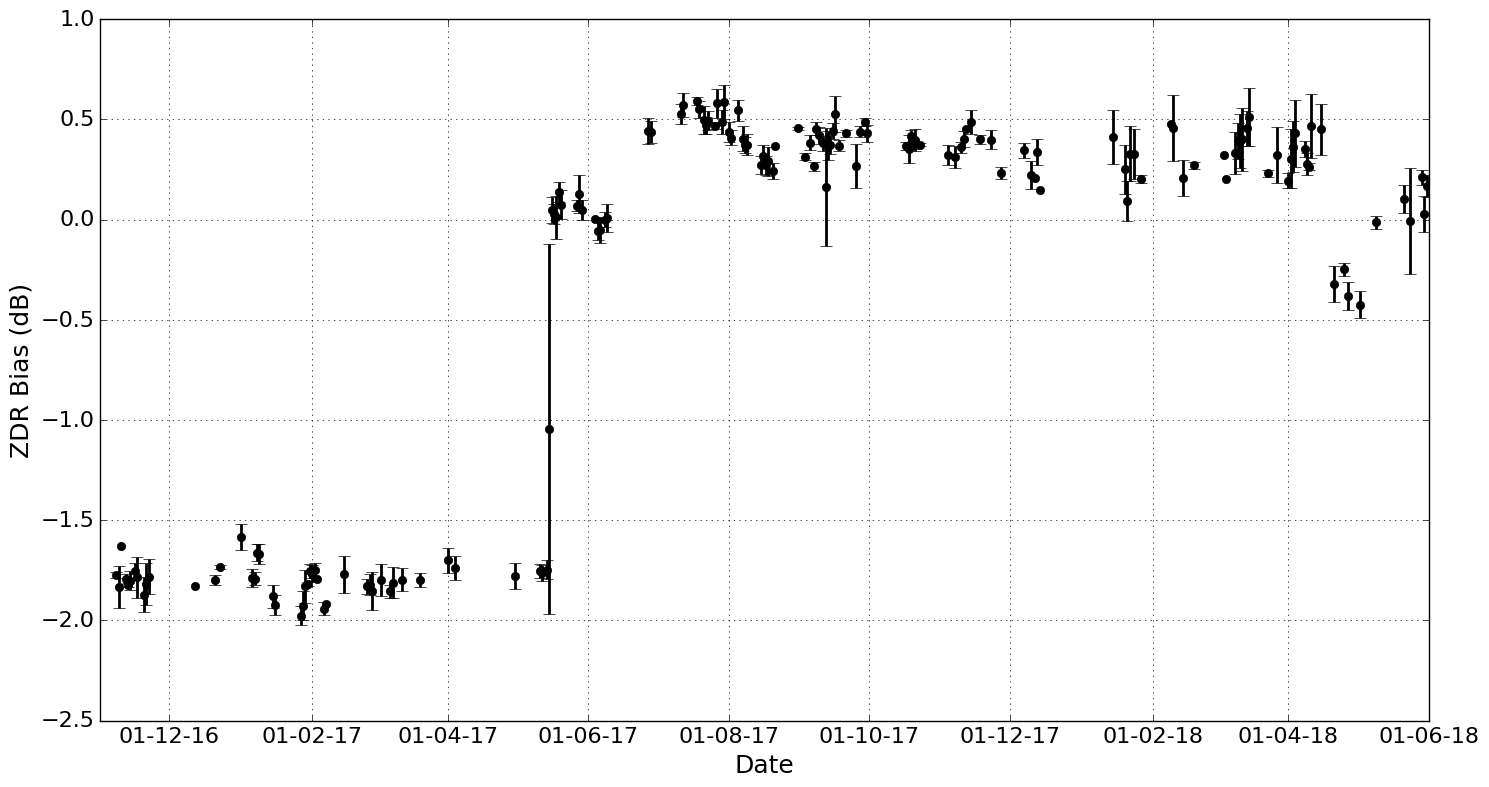

In [5]:
#(3) Make a plot showing all ZDR data across the year
fig,ax1 = plt.subplots(figsize=(15,8))#figure()

#plt.plot_date(all_data.index,all_data['ZDR'],'kx')
#plt.plot_date(zdr_day_avg1.index,zdr_day_avg1['ZDR'],'ro')
plt.errorbar(zdr_day_avg1.index,zdr_day_avg1['ZDR'],yerr=zdr_std1['ZDR'],color='black',fmt='o',
             markersize='6', elinewidth=2, capsize=4)
#plt.errorbar(zdr_day_avg2.index,zdr_day_avg2['H_ZDR'],yerr=zdr_std2['H_ZDR'],color='black',fmt='o',
#             markersize='6', elinewidth=2,capsize=4)
#plt.plot_date(biweekly_mean.index, biweekly_mean['ZDR'],'rx-')

plt.yticks(size=16)
plt.xticks(size=16)
plt.grid()

plt.ylabel('ZDR Bias (dB)', fontsize=18)
plt.xlabel('Date', fontsize=18)


plt.xlim([dt.datetime(2016, 11, 1),dt.datetime(2018, 6, 1)])

monthyearFmt = mdates.DateFormatter('%d-%m-%y')
ax1.xaxis.set_major_formatter(monthyearFmt)


# ax2=ax1.twinx()
# #ax2.set_ylim(0,20000)
# for date in proc_dates[0:]:
#     ax2.plot(aws_all_data[date].index, aws_all_data[date]['TA'],'b-')
# #ax2.set_yticks([5000, 10000])
# #ax2.set_yticks([1000, 2000, 3000, 4000, 7500],minor=True)
# plt.ylabel('Temperature',{'fontsize':18})
# plt.yticks(size=18)
#plt.xlim(pd.to_datetime('20200501'),pd.to_datetime('20200530'))

k9outdir = '/nfs/foe-data-32/export/ncas/earljbe/CHILBOLTON/calibrations/ZDRcalib/'

img_name = os.path.join(k9outdir,'full_chil_zdr_error_080620.png')
plt.tight_layout()
plt.savefig(img_name,dpi=150)

#Save plot
#plt.savefig(os.path.join(outdir,'images','full_raine_zdr.png'))
#plt.close()



In [12]:
print np.nanmedian(all_hourly_data.loc['2016-11-01 09:30:04':'2017-05-15 08:55:01']['H_ZDR']) 
print np.nanmedian(all_hourly_data.loc['2017-05-15 09:08:47':'2017-05-15 09:49:14']['H_ZDR']) 
print np.nanmedian(all_hourly_data.loc['2017-05-15 10:06:31':'2017-06-11 23:59:29']['H_ZDR']) 
print np.nanmedian(all_hourly_data.loc['2017-06-14 00:00:21':'2017-12-15 10:37:08']['H_ZDR'])
print np.nanmedian(all_hourly_data.loc['2018-01-11 17:35:07':'2018-03-28 09:28:01']['H_ZDR'])
print np.nanmedian(all_hourly_data.loc['2018-03-28 09:54:15':'2018-04-16 15:53:57']['H_ZDR'])
print np.nanmedian(all_hourly_data.loc['2018-04-20 00:04:01':'2018-05-09 11:28:45']['H_ZDR'])
print np.nanmedian(all_hourly_data.loc['2018-05-09 12:35:44':'2018-06-04 14:55:37']['H_ZDR'])
#all_data.resample(index).mean()

-1.7856798470020294
0.2560151666402817
0.005686787102604285
0.39452120661735535
0.2856520414352417
0.2776686102151871
-0.38314754515886307
0.11515755578875544


In [ ]:
# print np.nanmedian(all_data.loc['2018-10-30':'2018-11-13']['ZDR']), 
# np.nanmedian(all_data.loc['2018-11-14':'2020-02-01']['ZDR']),
# np.nanmedian(all_data.loc['2020-02-16':'2020-04-01']['ZDR'])

In [13]:
#zdr_day_avg1['2017-06-27':'2018-04-30']


In [ ]:
#(4) Make plot of all melting layers across whole period
# fig = plt.figure(figsize=(15,8))

# ax1 = fig.add_axes([0, 0, 1, 1])
# ax2 = fig.add_axes()
# # This is the magic that joins the x-axis
# ax2 = ax1.twinx()

# ax1.plot(zdr_day_avg.index,zdr_day_avg['H_ML'],'bx')
# ax2.plot(aws.index,aws['Temp C'],'rx-')


#plt.plot_date(all_hourly_data.index,all_hourly_data['H_ML'],'kx')
#plt.plot_date(zdr_day_avg.index,zdr_day_avg['H_ML'],'bx')

#plt.yticks(size=16)
#plt.xticks(size=16)
#plt.grid()

#plt.ylabel('Melting Layer (km)', fontsize=18)
#plt.xlabel('Date', fontsize=18)

#Save plot
#plt.savefig(os.path.join(outdir,'images','full_raine_ml.png'))
#plt.close()